# Pandas 3
### Maxwell Nielsen
### Section 001
### 9/13/2022

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Problem 1

In [2]:
def prob1():
    """
    Use groupby objects to determine information about private
    and public universities.
    Specifically examine the columns 'S.F.Ratio', 'Top10perc',
    and 'Top25perc'.
    For each column return the values of the describe function
    for the type of university with the higher mean.
    
    Return:
        ans_1 (ndarray): describe array of universities with 
                         higher S.F.Ratio
        ans_2 (ndarray): describe array of universities with
                         more students from Top10perc
        ans_3 (ndarray): describe array of universities with
                         more students from Top25perc
    """
    college_inf = pd.read_csv("college.csv")                 #read in the college data
    enroll_type = college_inf.groupby("Private")             #group by type of enrollment
    
    private = enroll_type.get_group("Yes")
    public = enroll_type.get_group("No")
    
    private_sf_inf = private["S.F.Ratio"].describe().values     #get the stat values of the sf ratio for each
    public_sf_inf = public["S.F.Ratio"].describe().values
    
    if private_sf_inf[1] > public_sf_inf[1]:             #find the type with higher mean
        ans_1 = private_sf_inf
    else:
        ans_1 = public_sf_inf
        
    private_tp10_inf = private["Top10perc"].describe().values
    public_tp10_inf = public["Top10perc"].describe().values     #get stat values of top10perc for each
    
    if private_tp10_inf[1] > public_tp10_inf[1]:
        ans_2 = private_tp10_inf
    else:
        ans_2 = public_tp10_inf          #find type with higher mean
        
    private_tp25_inf = private["Top25perc"].describe().values
    public_tp25_inf = public["Top25perc"].describe().values           #get stat values of top25perc for each
     
    if private_tp25_inf[1] > public_tp25_inf[1]:
        ans_3 = private_tp25_inf
    else:
        ans_3 = public_tp25_inf        #find type with higher mean
        
    return ans_1, ans_2, ans_3
        
    

In [3]:
prob1()

(array([212.        ,  17.13915094,   3.41804873,   6.7       ,
         15.1       ,  17.25      ,  19.325     ,  28.8       ]),
 array([565.        ,  29.33097345,  17.85139147,   1.        ,
         17.        ,  25.        ,  36.        ,  96.        ]),
 array([565.        ,  56.95752212,  19.58836048,   9.        ,
         42.        ,  55.        ,  70.        , 100.        ]))

# Problem 2

In [4]:
def prob2():
    """
    Use groupby visualizations to compare the following
    in private and public universities:
        1. Number of applicants, accept applicants, and
           enrolled applicants
        2. Range of price for room and board
    """
    
    college_inf = pd.read_csv("college.csv")                 #read in the college data
    enroll_type = college_inf.groupby("Private")             #group by type of enrollment
    
    private = enroll_type.get_group("Yes")
    public = enroll_type.get_group("No")
    
    college_inf.rename(columns = {'Apps': 'Applied', 'Accept': 'Accepted', 'Enroll':'Enrolled'}, inplace=True)
    
    enroll_type[["Applied", "Accepted", "Enrolled"]].mean().plot(kind="barh",  #create a bar graph displaying the info
                xerr=enroll_type.std(), title="Comparing Types of Schools")
    plt.xlabel("Number of Students")
    plt.ylabel('Private')
    plt.show()
    
    college_inf.boxplot(["Room.Board"], by="Private", grid=False)    #make a boxplot showing the range of costs
    plt.title('Range of Money Spent on Room and Board')
    plt.ylabel('Room and Board Costs')
    plt.tight_layout()
    plt.show()

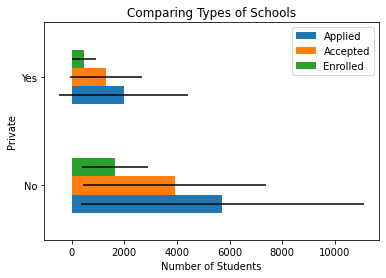

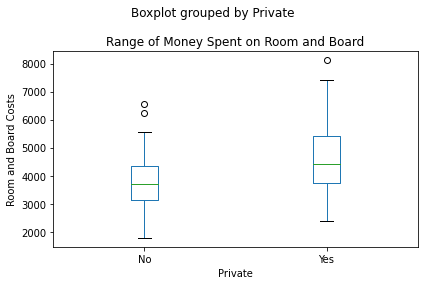

In [5]:
prob2()

# Problem 3

In [6]:
def prob3():
    """
    Use Ohio_1999.csv and pivot tables to answer the
    following questions
        1. Which race/sex combination makes the most money in total?
        2. Which race/sex combination worked the least amount of 
            cumulative hours?
        3. What race/sex combination worked the most hours per week per person?
    
    Returns:
        ans_1 (tuple): tuple with race and sex code, respectively
        ans_2 (tuple): tuple with race and sex code, respectively
        ans_3 (tuple): tuple with race and sex code, respectively
    """
    ohio_inf = pd.read_csv("Ohio_1999.csv")     #read in the data
    wk_income = ohio_inf.pivot_table(values="Usual Weekly Earnings", index="Race", columns="Sex", aggfunc="sum")  
    ans_1 = wk_income.stack().idxmax()   #create our pivot table and find the max
    
    wk_income = ohio_inf.pivot_table(values="Usual Hours Worked", index="Race", columns="Sex", aggfunc="count")
    ans_2 = wk_income.stack().idxmin()     #create our pivot table and find the min
    
    wk_income = ohio_inf.pivot_table(values="Usual Hours Worked", index="Race", columns="Sex", aggfunc="mean")
    ans_3 = wk_income.stack().idxmax()      #create our pivot table and find the max
    
    return ans_1, ans_2, ans_3

In [7]:
prob3()

((1, 1), (3, 2), (3, 1))

# Problem 4

In [8]:
def prob4():
    """
    Use Ohio_1999.csv to answer the following questions:
        1. What is the most common degree among workers?
        2. Which age group works the most hours on average?
        3. What age/degree combination has the smallest yearly
           salary on average?
    
    Return:
        ans_1 (Interval): degree interval
        ans_2 (Interval): age interval
        ans_3 (Interval, Interval): age interval and degree interval
    """
    ohio_inf = pd.read_csv("Ohio_1999.csv")     #read in the data
    degree = pd.cut(ohio_inf['Educational Attainment'], [0, 39, 42, 46])   #create our partition of education
    deg = ohio_inf.pivot_table(values="Educational Attainment", index=[degree], aggfunc="count") 
    ans_1 = deg.sum(axis=1).idxmax()    #create our pivot table and find the max interval
    
    age = pd.qcut(ohio_inf["Age"], 6)       #create 5 equally spaced age partitions
    age_groups = ohio_inf.pivot_table(values="Usual Hours Worked", index=[age], aggfunc="mean")
    ans_2 = age_groups.sum(axis=1).idxmax()    #create our pivot table and find the max interval
    
    both = ohio_inf.pivot_table(values="Yearly Salary", index=[age], columns=[degree], aggfunc="mean")
    ans_3 = both.stack().idxmin()       #use both partitions and find the min index
    
    
    
    return ans_1, ans_2, ans_3

In [9]:
prob4()

(Interval(0, 39, closed='right'),
 Interval(40.0, 46.0, closed='right'),
 (Interval(15.999, 29.0, closed='right'), Interval(0, 39, closed='right')))

# Problem 5

In [10]:
def prob5():
    """
    Use pivot tables and groupby objects on the data in
    College.csv to answer the following questions:
        1. Is there a correlation between the percent of alumni
           that donate and the amount the school spends per
           student in both private and public universities?
        2. Is the graduation rate partition with the greatest
           number of schools the same for private and public
           universities?
        3. Is there an inverse correlation between acceptance
           rate and having students from the top 10% of their
           high school class?
        4. Why is the average percentage of students admitted
           from the top 10 percent of their high school class
           so high in private universities with very low
           acceptance rates? Use only the data to explain why; 
           do not extrapolate.
    
    Returns:
        ans_1 (bool): answer to question 1
        ans_2 (bool): answer to question 2
        ans_3 (bool): answer to question 3
        ans_4 (str): answer to question 4
    """
    college_inf = pd.read_csv("college.csv")                 #read in the college data
    enroll_type = college_inf.groupby("Private")             #group by type of enrollment
    
    don_correlation = college_inf[['perc.alumni', 'Expend']].corr()
    print(don_correlation,'\n')
    ans_1 = False
    
    a_rates = pd.qcut(college_inf["Grad.Rate"], 5)       #create 5 equally spaced age partitions
    acceptance = college_inf.pivot_table(values='Grad.Rate',index=[a_rates], columns='Private',aggfunc="count")
    print(acceptance,'\n')
    ans_2 = False
    
    acc_correlation = college_inf[['Accept', 'Top10perc']].corr()      #create corr matrix between acceptance and being in top 10 percent
    print(acc_correlation,'\n')
    ans_3 = False
    
    college_inf['Acceptance Rate'] = college_inf['Accept'] / college_inf['Apps']
    
    selective = college_inf[college_inf['Acceptance Rate'] < .35]   #find the distribution of selective schools
    print(selective['Private'].value_counts(),'\n')
    ans_4 = 'Out of the 17 schools with acceptance rates of less than 35%, private schools accounted for 16 of them. Private schools can be much more selective and choose better students.'
    
    return ans_1, ans_2, ans_3, ans_4
    
    

In [11]:
prob5()

             perc.alumni    Expend
perc.alumni     1.000000  0.417712
Expend          0.417712  1.000000 

Private        No  Yes
Grad.Rate             
(9.999, 51.0]  83   78
(51.0, 61.0]   56   98
(61.0, 70.0]   40  122
(70.0, 81.0]   23  129
(81.0, 118.0]  10  138 

             Accept  Top10perc
Accept     1.000000   0.192447
Top10perc  0.192447   1.000000 

Yes    16
No      1
Name: Private, dtype: int64 



(False,
 False,
 False,
 'Out of the 17 schools with acceptance rates of less than 35%, private schools accounted for 16 of them. Private schools can be much more selective and choose better students.')